In [3]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.datasets import load_files
import pandas as pd
import numpy as np
from function import str_to_list
import re

In [4]:
from wordcloud import WordCloud
from pythainlp.corpus import thai_stopwords
th_stop_origin = tuple(thai_stopwords())

In [5]:
df = pd.read_csv('csv/new_data.csv')

Data Preparation

In [6]:
def text_process(text):
    text = re.sub("\[|\]|'|,"," ",text).replace(" ", "")
    return text
def text_process_save_comma(text): ##save ,
    text = re.sub("\[|\]|'|"," ",text).replace(" ", "")
    text = re.sub(r'[0-9]+'," ",text)
    return text
    
# df['text_replace'] = df['text'].apply(text_process)
df['text_replace'] = df['text'].apply(text_process_save_comma)
df

,post_type,text,text_replace
0,2,"['หา', 'สัญญา', 'หอ', 'มจพ', 'ย้าย', 'ปลาย', '...","หา,สัญญา,หอ,มจพ,ย้าย,ปลาย,พฤศ,จิ,ธันวา,เรท,ราค..."
1,1,"['ขาย', 'ตั๋วหนัง', 'black', 'panther', 'โรง',...","ขาย,ตั๋วหนัง,black,panther,โรง,เมเจอร์,gateway..."
2,1,"['อนุญาต', 'ขาย', 'ขาย', 'ตู้', 'เย็น', 'Midea...","อนุญาต,ขาย,ขาย,ตู้,เย็น,Midea, ,q, ,บาท,ขาย,เค..."
3,1,"['XX', 'คน', 'เช่า', 'XX', 'อนุญาต', 'ประกาศ',...","XX,คน,เช่า,XX,อนุญาต,ประกาศ,ประชาสัมพันธ์,สำหร..."
4,1,"['ขาย', 'สัญญา', 'หอ', 'หมู่บ้าน', 'สิ', 'ริน'...","ขาย,สัญญา,หอ,หมู่บ้าน,สิ,ริน, ,ห้อง,ชั้น, , ,ห..."
...,...,...,...
1403,1,"['ขาย', 'สัญญา', 'S9', 'Residence', 'ชั้น', '9...","ขาย,สัญญา,S ,Residence,ชั้น, ,ห้อง, ,ต้น,เดือน..."
1404,2,"['แนว', 'ข้อ', 'สอบ', 'รอบ', 'สอบตรง', 'สำหรับ...","แนว,ข้อ,สอบ,รอบ,สอบตรง,สำหรับ,ปวส,รู้,ข้อ,สอบ,..."
1405,0,"['คน', 'ลืม', 'ศาลยีราฟ', 'ฝาก', 'ร้าน', 'ถ่าย...","คน,ลืม,ศาลยีราฟ,ฝาก,ร้าน,ถ่าย,เอกสาร,ริม,น้ำ"
1406,2,"['พี่', 'คน', 'รอบ', '2', 'สอบ', 'ข้อ', 'แนะนำ...","พี่,คน,รอบ, ,สอบ,ข้อ,แนะนำ,สอบ,คณิต,อังกฤษ,Bms..."


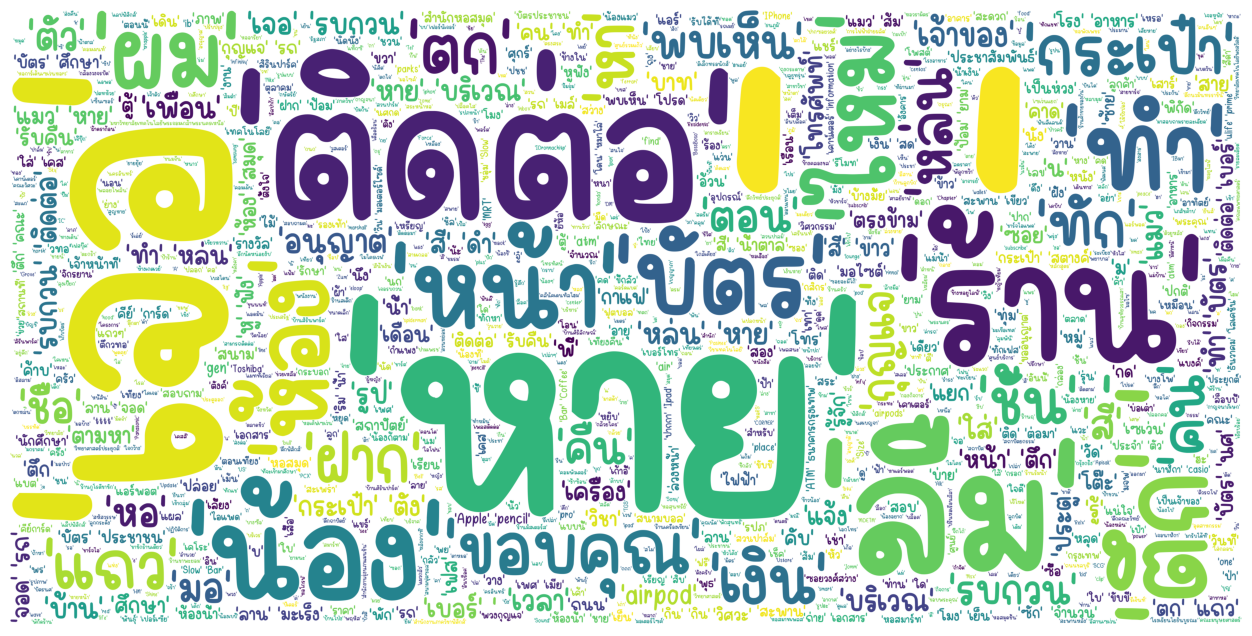

In [38]:
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud, STOPWORDS
# df_pos = df[df['post_type'] == 0]
# pos_word_all = " ".join(text for text in df_pos['text'])
# reg = r"[ก-๙a-zA-Z']+"
# fp = 'content\Ethan.ttf'
# wordcloud = WordCloud(stopwords=th_stop_origin, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
# plt.figure(figsize = (16,8))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

In [39]:
# df_pos = df[df['post_type'] == 1]
# pos_word_all = " ".join(text for text in df_pos['text'])
# reg = r"[ก-๙a-zA-Z']+"
# fp = 'content\Ethan.ttf'
# wordcloud = WordCloud(stopwords=th_stop_origin, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
# plt.figure(figsize = (16,8))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

In [5]:
# df_pos = df[df['post_type'] == 3]
# pos_word_all = " ".join(text for text in df_pos['text'])
# reg = r"[ก-๙a-zA-Z']+"
# fp = 'content\Ethan.ttf'
# wordcloud = WordCloud(stopwords=th_stop_origin, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
# plt.figure(figsize = (16,8))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

In [7]:
X = df['text_replace']
# X = df['text']
y = df["post_type"]

In [8]:
X[0]

'หา,สัญญา,หอ,มจพ,ย้าย,ปลาย,พฤศ,จิ,ธันวา,เรท,ราคา,ห้อง, ,บาท'

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

**Built model**

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
def word_split(text):
    words = re.split(r",",text)
    return words
vectorizer = CountVectorizer(analyzer=word_split,
                             tokenizer=None,
                             preprocessor=None,
                             stop_words=None,
                             max_features=5000,
                             ngram_range=(1, 2))
c_feat = vectorizer.fit_transform(X_train)

In [17]:
vectorizer.vocabulary_

{'หา': 2573,
 'สัญญา': 2355,
 'หอ': 2515,
 'S ': 288,
 'รีบ': 2066,
 'เดือน': 2858,
 'ขาย': 854,
 'หอพัก': 2529,
 'U': 348,
 'Life': 194,
 'Apartment': 26,
 'วัด': 2206,
 'ตึก': 1300,
 ' ': 1,
 'ชั้น': 1087,
 'สนใจ': 2296,
 'คุย': 989,
 'ราคา': 2046,
 'กันได้': 768,
 'เม': 2952,
 'ย': 1958,
 'ห้อง': 2608,
 'สุดท้าย': 2423,
 'ไม่ต้อง': 3344,
 'จ่าย': 1064,
 'เตียง': 2870,
 'ฟุต': 1812,
 'แอร์': 3195,
 'ตัว': 1258,
 'โต๊ะทำงาน': 3229,
 'โต๊ะ': 3226,
 'ยาวติดกัน': 1976,
 'ชั้นวางของ': 1088,
 'ตู้เสื้อผ้า': 1316,
 'คีย์': 977,
 'การ์ด': 781,
 'ใบ': 3310,
 'ระเบียง': 2029,
 'ไฟ': 3335,
 'เส้น': 3032,
 'led': 524,
 'รอบ': 2022,
 'ติดต่อ': 1287,
 'ขอดู': 838,
 'สอบถามรายละเอียด': 2338,
 'inbox': 501,
 'Linekwaneii': 196,
 'Tell': 337,
 'หิ้ว': 2597,
 'น้า': 1491,
 'เด้ออ': 2861,
 'มิถุน้า': 1924,
 'ทัก': 1363,
 'โลยยย': 3279,
 'พัก': 1735,
 'mentor': 549,
 'มิถุนายน': 1923,
 'จอด': 1030,
 'มอเตอร์ไซค์': 1884,
 'รถ': 2000,
 'ยนต์': 1962,
 'ริม': 2062,
 'คลอง': 912,
 'แบ่ง': 3127,
 'หัวปากกา': 

In [18]:
c_feat[:,:20].todense()

matrix([[ 0,  0,  0, ...,  0,  0,  0],
        [ 0, 11,  0, ...,  0,  0,  0],
        [ 0,  1,  0, ...,  0,  0,  0],
        ...,
        [ 0,  2,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  1,  0, ...,  0,  0,  0]], dtype=int64)

In [19]:
from sklearn.naive_bayes import MultinomialNB
cls = MultinomialNB(alpha=1.0, fit_prior=True)
# transform the list of text to tf-idf before passing it to the model
cls.fit(vectorizer.transform(X_train), y_train)
 
from sklearn.metrics import classification_report, accuracy_score
 
y_pred = cls.predict(vectorizer.transform(X_test))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8863636363636364
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        57
           1       0.85      0.90      0.88       125
           2       0.91      0.85      0.88       170

    accuracy                           0.89       352
   macro avg       0.89      0.90      0.89       352
weighted avg       0.89      0.89      0.89       352



In [20]:
import joblib

filename = "./model/check_type.sav"
filenamevec = "./model/count_vectorizer.sav"

joblib.dump(cls,open(filename,"wb"))
joblib.dump(vectorizer,open(filenamevec,"wb"))